In [ ]:
%pip install matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("Shape :", df.shape)
print()
df.info()

Shape : (8807, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Unknown")
df["duration"] = df["duration"].fillna("Unknown")
df["listed_in"] = df["listed_in"].str.split(", ")

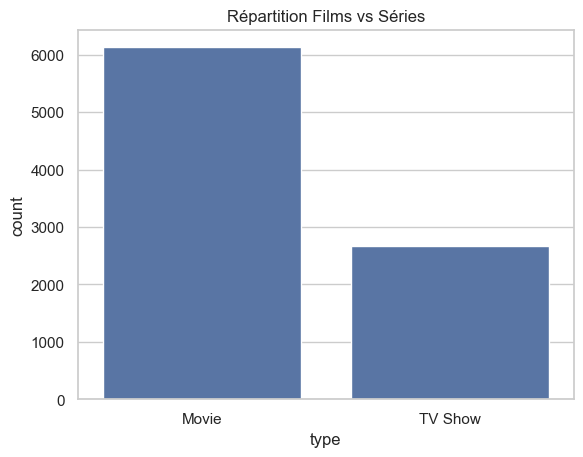

In [8]:
sns.countplot(data=df, x="type")
plt.title("Répartition Films vs Séries")
plt.show()

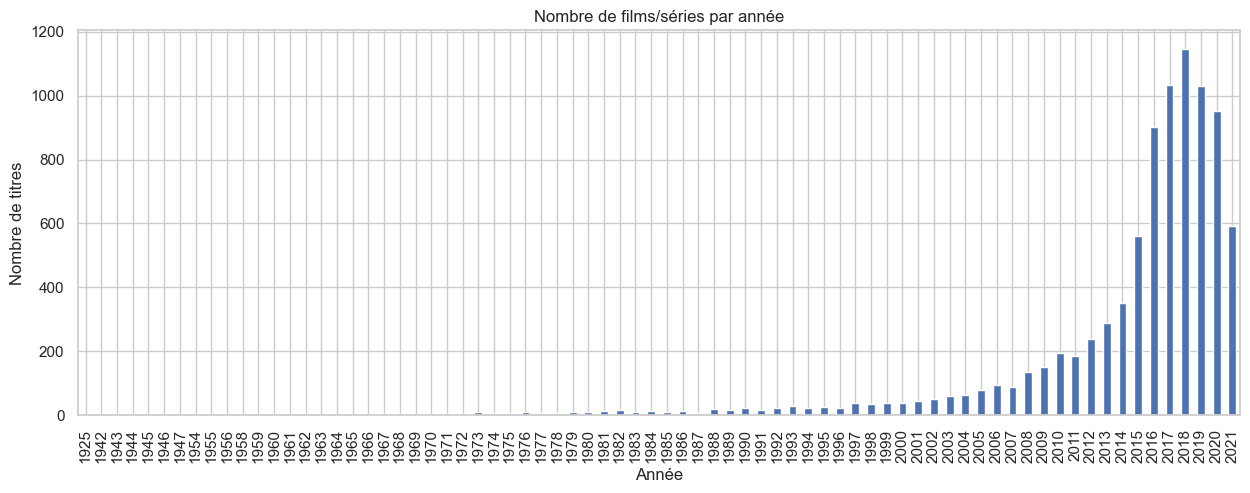

In [9]:
df["release_year"].value_counts().sort_index().plot(kind="bar", figsize=(15,5))
plt.title("Nombre de films/séries par année")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.show()

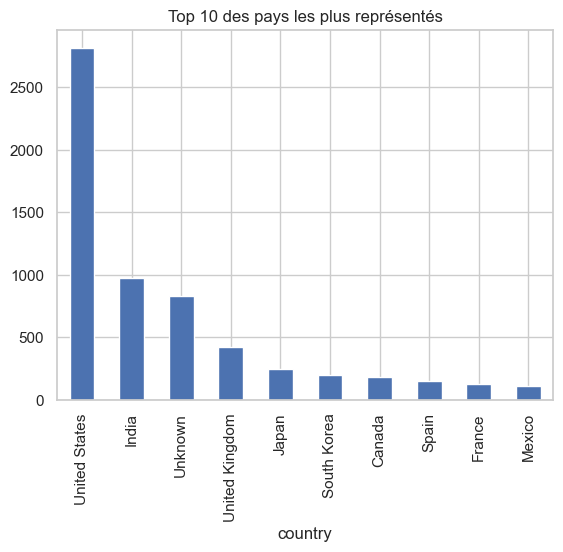

In [10]:
df["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 des pays les plus représentés")
plt.show()

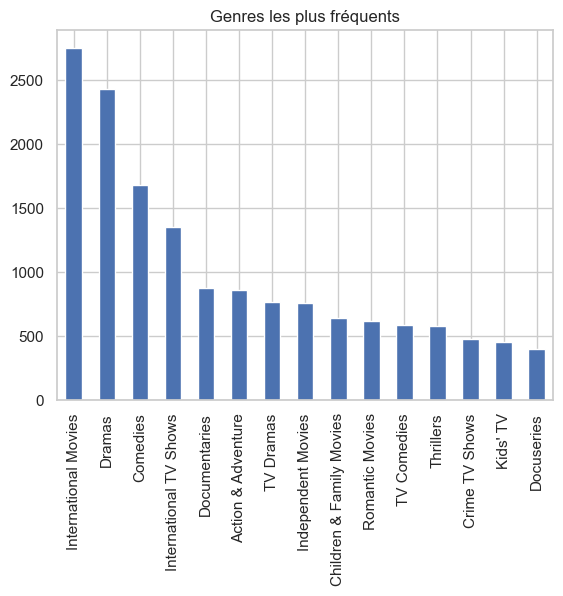

In [11]:
from collections import Counter

genres = Counter([g for sublist in df["listed_in"] for g in sublist])
pd.Series(genres).sort_values(ascending=False).head(15).plot(kind="bar")
plt.title("Genres les plus fréquents")
plt.show()

In [22]:
films = df[df["type"] == "Movie"].copy()

In [23]:
print("Exemples de valeurs 'duration' :")
print(films["duration"].unique()[:50])

Exemples de valeurs 'duration' :
['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min']


In [24]:
mask_min = films["duration"].str.contains(r'\d+\s*min', na=False)

In [25]:
print("\nNombre de films avec 'min' dans duration :", mask_min.sum())
print("Nombre total de films :", len(films))


Nombre de films avec 'min' dans duration : 6128
Nombre total de films : 6131


In [26]:
films_min = films[mask_min].copy()

In [27]:
films_min["duration_min"] = films_min["duration"].str.extract(r'(\d+)')
films_min["duration_min"] = pd.to_numeric(films_min["duration_min"], errors="coerce").astype("Int64")

In [28]:
print("\nValeurs nulles après conversion (devrait être 0) :", films_min["duration_min"].isna().sum())


Valeurs nulles après conversion (devrait être 0) : 0


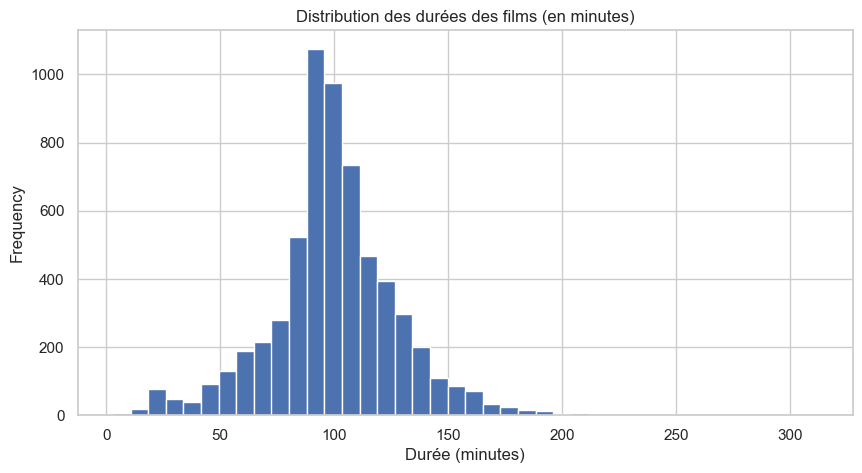

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
films_min["duration_min"].dropna().astype(int).plot(kind="hist", bins=40)
plt.title("Distribution des durées des films (en minutes)")
plt.xlabel("Durée (minutes)")
plt.show()

In [30]:
autres = films[~mask_min]["duration"].value_counts().head(20)
print("\nExemples de formats non-min (quelques-unes) :")
print(autres)


Exemples de formats non-min (quelques-unes) :
duration
Unknown    3
Name: count, dtype: int64
